In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
'''
Returns the sum of 2 vectors of not necesseraly the same length by appending 0's to the shorter vector.
'''
def sum_two_vec_pad(a, b):
    if len(a) < len(b):
        c = b.copy()
        c[:len(a)] += a
    else:
        c = a.copy()
        c[:len(b)] += b
    return c

'''
returns the energy for an estimated weight vector omega, with data (X, Y)
'''
def energy(w, X, Y):
    Y_est = np.sign(np.dot(X, w))
    return 0.5 * np.sum((Y - Y_est)**2)

def accept_prob(wp, w, beta, X, Y):
    return min(1, np.exp(-beta*(energy(wp, X, Y) - energy(w, X, Y))))

def overlap(wp, w):
    return 1.0 / (w.shape[0]) * np.dot(w, wp)

In [3]:
###

### Part 1

###


################ 1.

def metropolis(w_init, beta, X, Y, epsilon=0):

    N = w_init.shape[0]
    w = np.copy(w_init)
    wp = np.copy(w)

    energy_record = np.array([])
    energy_record = np.append(energy_record, energy(w_init, X, Y))

    while (energy(w, X, Y) > epsilon):

        index_rand = np.random.randint(0, N)
        wp = np.copy(w)
        wp[index_rand] = -1 * wp[index_rand]

        if np.random.uniform() < accept_prob(wp, w, beta, X, Y):
            w = np.copy(wp)

        energy_record= np.append(energy_record, energy(w, X, Y))

    return w, energy_record

def metropolis_mult(nb_runs, beta, X, Y, epsilon=0):
    N = X.shape[1]
    energy_record_acc = np.zeros(N)

    for k in range(0, nb_runs):
        w_init =  2 * np.random.random_integers(0, 1, N) - 1
        _, energy_record = metropolis(w_init, beta, X, Y, epsilon)
        energy_record_acc = sum_two_vec_pad(energy_record_acc, energy_record)


    return energy_record_acc / nb_runs

C:\Users\furkan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  # Remove the CWD from sys.path while we load stuff.
C:\Users\furkan\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead


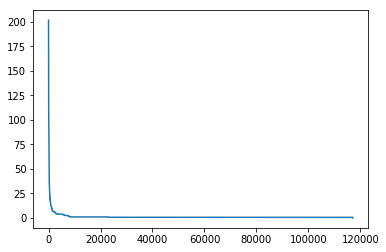

In [6]:
# Tests for part 1.

# alpha and beta in [0.5, 5], for 'interesting' results as per paper.
N = 40
M = 200
alpha = M / N
beta = 1
nb_runs = 100

w = 2 * np.random.random_integers(0, 1, N) - 1

X = np.random.randn(M, N)
Y = np.sign(np.dot(X, w))

part1_1 = metropolis_mult(nb_runs, beta, X, Y, epsilon=0)
plt.plot(part1_1);

In [29]:
###

### Part 1

###


################ 2.

def metropolis2(w_init, beta, X, Y, T=10):

    N = w_init.shape[0]
    M = X.shape[0]
    w = np.copy(w_init)
    wp = np.copy(w)

    for _ in range(0, T):

        index_rand = np.random.randint(0, N)
        wp = np.copy(w)
        wp[index_rand] = -1 * wp[index_rand]

        if np.random.uniform() < accept_prob(wp, w, beta, X, Y):
            w = np.copy(wp)

    energy_record = energy(w, X, Y)

    return (1.0/M) * energy_record

def metropolis_mult2(nb_runs, N, alpha_list, beta, T):

    normalized_energies_per_alpha = np.array([])

    for alpha in alpha_list:

        M = int(round(alpha * N))

        energy_record_acc = np.zeros(nb_runs)
        
        for i in range(nb_runs):

            w = 2 * np.random.random_integers(0, 1, N) - 1
            X = np.random.randn(M, N)
            Y = np.sign(np.dot(X, w))

            w_init = 2 * np.random.random_integers(0, 1, N) - 1

            energy_record_acc[i] = metropolis2(w_init, beta, X, Y, T)

        normalized_energies_per_alpha = np.append(normalized_energies_per_alpha, np.mean(energy_record_acc))

    return normalized_energies_per_alpha

C:\Users\furkan\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
C:\Users\furkan\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead


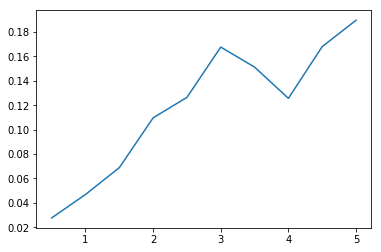

In [28]:
################

# Tests for part 2.

# alpha and beta in [0.5, 5], for 'interesting' results as per paper.
N = 20
beta = 1

alpha_list = np.linspace(0.5,5,10)
T = 100
nb_runs = 50
part1_2 = metropolis_mult2(nb_runs, N, alpha_list, beta, T)

plt.plot(alpha_list, part1_2);

In [19]:
###

### Part 1

###


################ 3.

def metropolis3(w_init, beta, X, Y, epsilon=0):

    N = w_init.shape[0]
    w = np.copy(w_init)
    wp = np.copy(w)

    while (energy(w, X, Y) > epsilon):

        index_rand = np.random.randint(0, N)
        wp = np.copy(w)
        wp[index_rand] = -1 * wp[index_rand]

        if np.random.uniform() < accept_prob(wp, w, beta, X, Y):
            w = np.copy(wp)

    return w

def metropolis_mult3(nb_runs, N, alpha_list, beta, epsilon=0):

    overlap_per_alpha = np.array([])

    for alpha in alpha_list:

        M = int(round(alpha * N))

        overlap_acc = np.zeros(nb_runs)
        
        for i in range(nb_runs):

            w = 2 * np.random.random_integers(0, 1, N) - 1
            X = np.random.randn(M, N)
            Y = np.sign(np.dot(X, w))

            w_init = 2 * np.random.random_integers(0, 1, N) - 1
            
            wp = metropolis3(w_init, beta, X, Y, epsilon)
            
            overlap_acc[i] = overlap(wp, w)

        overlap_per_alpha = np.append(overlap_per_alpha, np.mean(overlap_acc))

    return overlap_per_alpha

C:\Users\furkan\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
C:\Users\furkan\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead


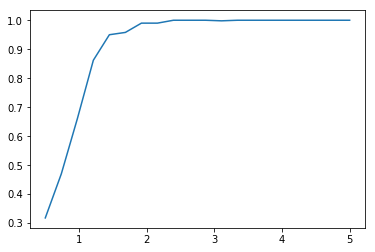

In [21]:
################

# Tests for part 3.

# alpha and beta in [0.5, 5], for 'interesting' results as per paper.
N = 20
beta = 1

alpha_list = np.linspace(0.5,5,20)
nb_runs = 50
part1_3 = metropolis_mult3(nb_runs, N, alpha_list, beta)

plt.plot(alpha_list, part1_3);

In [46]:
###

### Part 2

###


################ 1.

def metropolis4(w_init, beta_init, pace, step, is_pace, X, Y, T):

    N = w_init.shape[0]
    M = X.shape[0]
    w = np.copy(w_init)
    wp = np.copy(w)
    
    beta = beta_init
    
    for _ in range(0, T):

        index_rand = np.random.randint(0, N)
        wp = np.copy(w)
        wp[index_rand] = -1 * wp[index_rand]

        if np.random.uniform() < accept_prob(wp, w, beta, X, Y):
            w = np.copy(wp)
        
        if is_pace:
            beta *= pace
        else:
            beta += step
    
    energy_record = energy(w, X, Y)
    
    return w, (1.0/M) * energy_record


def metropolis_mult4(nb_runs, N, alpha_list, beta_init, pace, step, is_pace, T):
    
    normalized_energies_per_alpha = np.array([])
    overlap_per_alpha = np.array([])

    for alpha in alpha_list:

        M = int(round(alpha * N))

        overlap_acc = np.zeros(nb_runs)
        energy_record_acc = np.zeros(nb_runs)
        
        for i in range(nb_runs):

            w = 2 * np.random.random_integers(0, 1, N) - 1
            X = np.random.randn(M, N)
            Y = np.sign(np.dot(X, w))

            w_init = 2 * np.random.random_integers(0, 1, N) - 1
            
            wp, energy_record = metropolis4(w_init, beta_init, pace, step, is_pace, X, Y, T)
            
            energy_record_acc[i] = energy_record
            overlap_acc[i] = overlap(wp, w)

        overlap_per_alpha = np.append(overlap_per_alpha, np.mean(overlap_acc))
        normalized_energies_per_alpha = np.append(normalized_energies_per_alpha, np.mean(energy_record_acc))
        
    return normalized_energies_per_alpha, overlap_per_alpha

In [50]:
################

# Tests for part 1 and part 2

# alpha and beta in [0.5, 5], for 'interesting' results as per paper.
N = 20
beta_init = 1
pace = 1.02
step = 0.1
is_pace = True

alpha_list = np.linspace(0.5,5,20)
nb_runs = 50
T = 100

part2_1, part2_2 = metropolis_mult4(nb_runs, N, alpha_list, beta_init, pace, step, is_pace, T)

C:\Users\furkan\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
C:\Users\furkan\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead


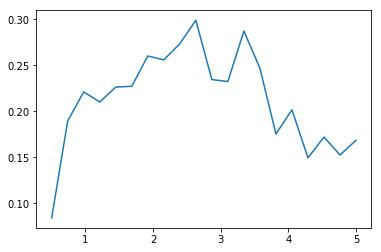

In [51]:
plt.plot(alpha_list, part2_1);

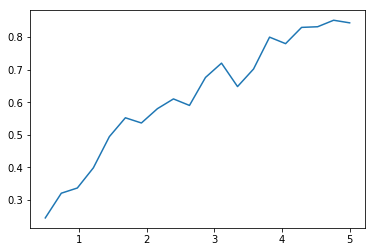

In [52]:
plt.plot(alpha_list, part2_2);